In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import random
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline
pd.plotting.register_matplotlib_converters()

Importing plotly failed. Interactive plots will not work.


In [6]:
cary_df = pd.read_csv('CaryPoliceIncidentsCSV.csv', error_bad_lines=False)

C:\Users\User_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,7,12,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# STEP #2: EXPLORING THE DATASET  

In [7]:
cary_df.tail()

,Unnamed: 0,ucr,domestic,phxrecordstatus,year,time_to,id,neighborhd_id,crime_type,district,...,total_incidents,phxcommunity,from_time,crime_category,activity_date,beat_number,record,incident_number,apartment_complex,map_reference
96394,59515,23C,N,NaN,NaN,NaN,1161,NaN,LARCENY - SHOPLIFTING,D3,...,1,No,NaN,LARCENY,NaN,115,75419,1161,NaN,P039
96395,70586,290,N,NaN,NaN,NaN,2000007,NaN,VANDALISM,D1,...,1,No,NaN,ALL OTHER,NaN,114,101117,2000007,NaN,P026
96396,70987,290,N,NaN,NaN,0001-01-01T12:00:00+00:00,4664,NaN,VANDALISM,NaN,...,1,No,NaN,ALL OTHER,NaN,117,103280,4664,NaN,NaN
96397,85335,13B,Y,NaN,NaN,NaN,1005014,NaN,ALL OTHER SIMPLE ASSAULT,D1,...,1,No,NaN,ALL OTHER,NaN,111,12760,1005014,NaN,P080
96398,85905,26A,N,NaN,NaN,NaN,1005438,NaN,FRAUD - FALSE PRETENSE,D1,...,1,No,NaN,ALL OTHER,NaN,114,45088,1005438,NaN,P035


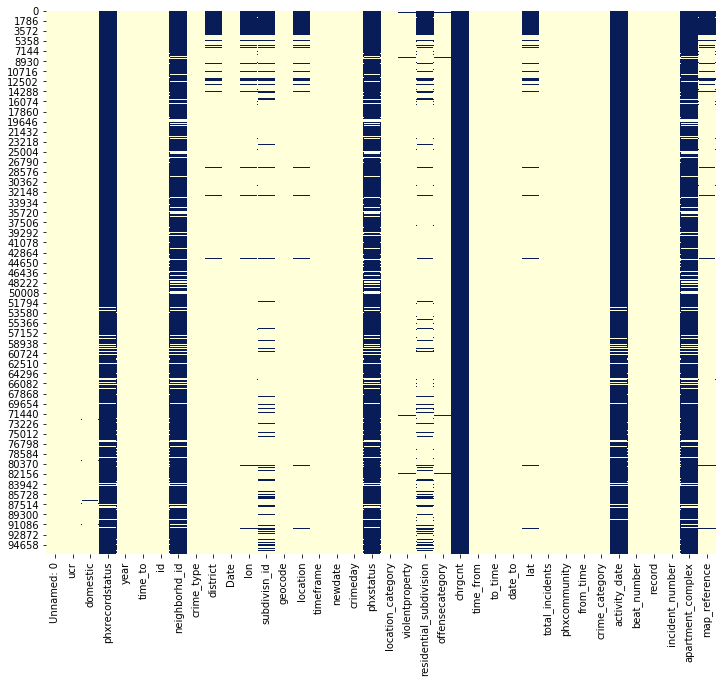

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(cary_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [9]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community X Coordinate Y Coordinate Year Updated On 
cary_df.drop(['Unnamed: 0', 'ucr', 'domestic', 'phxrecordstatus', 'time_to', 'id','neighborhd_id', 'phxcommunity', 'activity_date','beat_number', 'record', 'incident_number', 'map_reference', 'timeframe', 'subdivisn_id', 'phxstatus', 'chrgcnt'], inplace=True, axis=1)

In [10]:
cary_df.tail()

,year,crime_type,district,Date,lon,geocode,location,newdate,crimeday,location_category,...,residential_subdivision,offensecategory,time_from,to_time,date_to,lat,total_incidents,from_time,crime_category,apartment_complex
96394,NaN,LARCENY - SHOPLIFTING,D3,NaN,-78.783224,KILMAYNE DR,"{'lat': 35.769994868, 'lon': -78.78322362}",NaN,NaN,TOWN OWNED,...,NaN,Larceny,NaN,NaN,NaN,35.769995,1,NaN,LARCENY,NaN
96395,NaN,VANDALISM,D1,NaN,-78.792885,MADISON AV,"{'lat': 35.788308581, 'lon': -78.7928854}",NaN,NaN,TOWN OWNED,...,NaN,Vandalism,NaN,NaN,NaN,35.788309,1,NaN,ALL OTHER,NaN
96396,NaN,VANDALISM,NaN,NaN,NaN,SW MAYNARD RD,NaN,NaN,FRIDAY,TOWN OWNED,...,NaN,Vandalism,NaN,10/28/2019 12:00,2000-10-06T16:00:00+00:00,NaN,1,NaN,ALL OTHER,NaN
96397,NaN,ALL OTHER SIMPLE ASSAULT,D1,NaN,-78.773895,MIDENHALL WAY,"{'lat': 35.827231445, 'lon': -78.7738948}",NaN,NaN,TOWN OWNED,...,WESSEX,Simple Assault,NaN,NaN,NaN,35.827231,1,NaN,ALL OTHER,NaN
96398,NaN,FRAUD - FALSE PRETENSE,D1,NaN,-78.781425,W CHATHAM ST,"{'lat': 35.787107578, 'lon': -78.78142487}",NaN,NaN,TOWN OWNED,...,ASHWORTH VILLAGE CENTER,Fraud,NaN,NaN,NaN,35.787108,1,NaN,ALL OTHER,NaN


In [11]:
cary_df.Date = pd.to_datetime(cary_df.Date, format='%m/%d/%Y')
cary_df

,year,crime_type,district,Date,lon,geocode,location,newdate,crimeday,location_category,...,residential_subdivision,offensecategory,time_from,to_time,date_to,lat,total_incidents,from_time,crime_category,apartment_complex
0,2000.0,ALL OTHER,NaN,2000-02-04,NaN,CASTALIA DR,NaN,2000-02-04T00:00:00+00:00,FRIDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T03:00:00+00:00,10/28/2019 22:07,2000-02-05T03:07:00+00:00,NaN,1,10/28/2019 3:00,ALL OTHER,NaN
1,2000.0,ALL OTHER,NaN,2000-07-14,NaN,DRYSTACK WAY,NaN,2000-07-14T00:00:00+00:00,FRIDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T16:00:00+00:00,10/28/2019 22:00,2000-07-15T02:00:00+00:00,NaN,1,10/28/2019 16:00,ALL OTHER,NaN
2,2000.0,ALL OTHER,NaN,2000-05-04,NaN,MILLER`S CREEK DR,NaN,2000-05-04T00:00:00+00:00,MONDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T15:25:00+00:00,10/28/2019 17:52,2000-09-25T21:52:00+00:00,NaN,1,10/28/2019 15:25,ALL OTHER,NaN
3,2000.0,ALL OTHER,NaN,2000-06-01,NaN,LAUREL WREATH LN,NaN,2000-06-01T00:00:00+00:00,THURSDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T21:30:00+00:00,10/28/2019 22:00,2000-12-22T03:00:00+00:00,NaN,1,10/28/2019 21:30,ALL OTHER,NaN
4,2000.0,ALL OTHER,NaN,2000-06-26,NaN,NEW EDITION CT,NaN,2000-06-26T00:00:00+00:00,TUESDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T14:00:00+00:00,10/28/2019 15:37,2000-06-27T19:37:00+00:00,NaN,1,10/28/2019 14:00,ALL OTHER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96394,NaN,LARCENY - SHOPLIFTING,D3,NaT,-78.783224,KILMAYNE DR,"{'lat': 35.769994868, 'lon': -78.78322362}",NaN,NaN,TOWN OWNED,...,NaN,Larceny,NaN,NaN,NaN,35.769995,1,NaN,LARCENY,NaN
96395,NaN,VANDALISM,D1,NaT,-78.792885,MADISON AV,"{'lat': 35.788308581, 'lon': -78.7928854}",NaN,NaN,TOWN OWNED,...,NaN,Vandalism,NaN,NaN,NaN,35.788309,1,NaN,ALL OTHER,NaN
96396,NaN,VANDALISM,NaN,NaT,NaN,SW MAYNARD RD,NaN,NaN,FRIDAY,TOWN OWNED,...,NaN,Vandalism,NaN,10/28/2019 12:00,2000-10-06T16:00:00+00:00,NaN,1,NaN,ALL OTHER,NaN
96397,NaN,ALL OTHER SIMPLE ASSAULT,D1,NaT,-78.773895,MIDENHALL WAY,"{'lat': 35.827231445, 'lon': -78.7738948}",NaN,NaN,TOWN OWNED,...,WESSEX,Simple Assault,NaN,NaN,NaN,35.827231,1,NaN,ALL OTHER,NaN


In [12]:
cary_df.index = pd.DatetimeIndex(cary_df.Date)
cary_df

,year,crime_type,district,Date,lon,geocode,location,newdate,crimeday,location_category,...,residential_subdivision,offensecategory,time_from,to_time,date_to,lat,total_incidents,from_time,crime_category,apartment_complex
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-04,2000.0,ALL OTHER,NaN,2000-02-04,NaN,CASTALIA DR,NaN,2000-02-04T00:00:00+00:00,FRIDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T03:00:00+00:00,10/28/2019 22:07,2000-02-05T03:07:00+00:00,NaN,1,10/28/2019 3:00,ALL OTHER,NaN
2000-07-14,2000.0,ALL OTHER,NaN,2000-07-14,NaN,DRYSTACK WAY,NaN,2000-07-14T00:00:00+00:00,FRIDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T16:00:00+00:00,10/28/2019 22:00,2000-07-15T02:00:00+00:00,NaN,1,10/28/2019 16:00,ALL OTHER,NaN
2000-05-04,2000.0,ALL OTHER,NaN,2000-05-04,NaN,MILLER`S CREEK DR,NaN,2000-05-04T00:00:00+00:00,MONDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T15:25:00+00:00,10/28/2019 17:52,2000-09-25T21:52:00+00:00,NaN,1,10/28/2019 15:25,ALL OTHER,NaN
2000-06-01,2000.0,ALL OTHER,NaN,2000-06-01,NaN,LAUREL WREATH LN,NaN,2000-06-01T00:00:00+00:00,THURSDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T21:30:00+00:00,10/28/2019 22:00,2000-12-22T03:00:00+00:00,NaN,1,10/28/2019 21:30,ALL OTHER,NaN
2000-06-26,2000.0,ALL OTHER,NaN,2000-06-26,NaN,NEW EDITION CT,NaN,2000-06-26T00:00:00+00:00,TUESDAY,TOWN OWNED,...,NaN,All Other Offenses,0001-01-01T14:00:00+00:00,10/28/2019 15:37,2000-06-27T19:37:00+00:00,NaN,1,10/28/2019 14:00,ALL OTHER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,LARCENY - SHOPLIFTING,D3,NaT,-78.783224,KILMAYNE DR,"{'lat': 35.769994868, 'lon': -78.78322362}",NaN,NaN,TOWN OWNED,...,NaN,Larceny,NaN,NaN,NaN,35.769995,1,NaN,LARCENY,NaN
NaT,NaN,VANDALISM,D1,NaT,-78.792885,MADISON AV,"{'lat': 35.788308581, 'lon': -78.7928854}",NaN,NaN,TOWN OWNED,...,NaN,Vandalism,NaN,NaN,NaN,35.788309,1,NaN,ALL OTHER,NaN
NaT,NaN,VANDALISM,NaN,NaT,NaN,SW MAYNARD RD,NaN,NaN,FRIDAY,TOWN OWNED,...,NaN,Vandalism,NaN,10/28/2019 12:00,2000-10-06T16:00:00+00:00,NaN,1,NaN,ALL OTHER,NaN


In [13]:
cary_df['crime_type'].value_counts()

LARCENY - ALL OTHER LARCENY                                   10263
LARCENY - FROM MOTOR VEHICLE                                   8862
LARCENY - SHOPLIFTING                                          6625
VANDALISM                                                      6403
BURGLARY - FORCIBLE ENTRY                                      4898
                                                              ...  
LIQUOR - SELLING/DISTRIBUT TAX PAID                               1
LIQUOR - UNDERAGE POSSESSION                                      1
TRAFFIC - HIT/RUN LEAVE SCENE OF PROPERTY DAMAGE                  1
FORGERY- POSSESSING/CONCEALING                                    1
TRAFFIC - SPEEDING - FAILURE TO DECREASE TO AVOID ACCIDENT        1
Name: crime_type, Length: 277, dtype: int64

In [14]:
cary_df['crime_type'].value_counts().iloc[:15]

LARCENY - ALL OTHER LARCENY                                     10263
LARCENY - FROM MOTOR VEHICLE                                     8862
LARCENY - SHOPLIFTING                                            6625
VANDALISM                                                        6403
BURGLARY - FORCIBLE ENTRY                                        4898
SIMPLE PHYSICAL ASSAULT                                          4024
VANDALISM - DAMAGE TO PROPERTY                                   3171
FRAUD - CREDIT CARD/ATM                                          2543
FRAUD - ALL OTHER                                                2328
DWI - DRIVING WHILE IMPAIRED ALCOHOL/DRUGS                       2100
ALL OTHER                                                        2005
ALL OTHER - WARRANT FOR ARREST                                   1924
ASSAULT - SIMPLE - ALL OTHER                                     1867
DRUGS - DRUG VIOLATIONS (POSS./SELL/MAN./DEL./TRNSPRT/CULT.)     1796
ALL OTHER - ALL TRAF

In [15]:
cary_df['crime_type'].value_counts().iloc[:15].index

Index(['LARCENY - ALL OTHER LARCENY', 'LARCENY - FROM MOTOR VEHICLE',
       'LARCENY - SHOPLIFTING', 'VANDALISM', 'BURGLARY - FORCIBLE ENTRY',
       'SIMPLE PHYSICAL ASSAULT', 'VANDALISM - DAMAGE TO PROPERTY',
       'FRAUD - CREDIT CARD/ATM', 'FRAUD - ALL OTHER',
       'DWI - DRIVING WHILE IMPAIRED ALCOHOL/DRUGS', 'ALL OTHER',
       'ALL OTHER - WARRANT FOR ARREST', 'ASSAULT - SIMPLE - ALL OTHER',
       'DRUGS - DRUG VIOLATIONS (POSS./SELL/MAN./DEL./TRNSPRT/CULT.)',
       'ALL OTHER - ALL TRAFFIC EXCEPT DWI (NON-UCR)'],
      dtype='object')

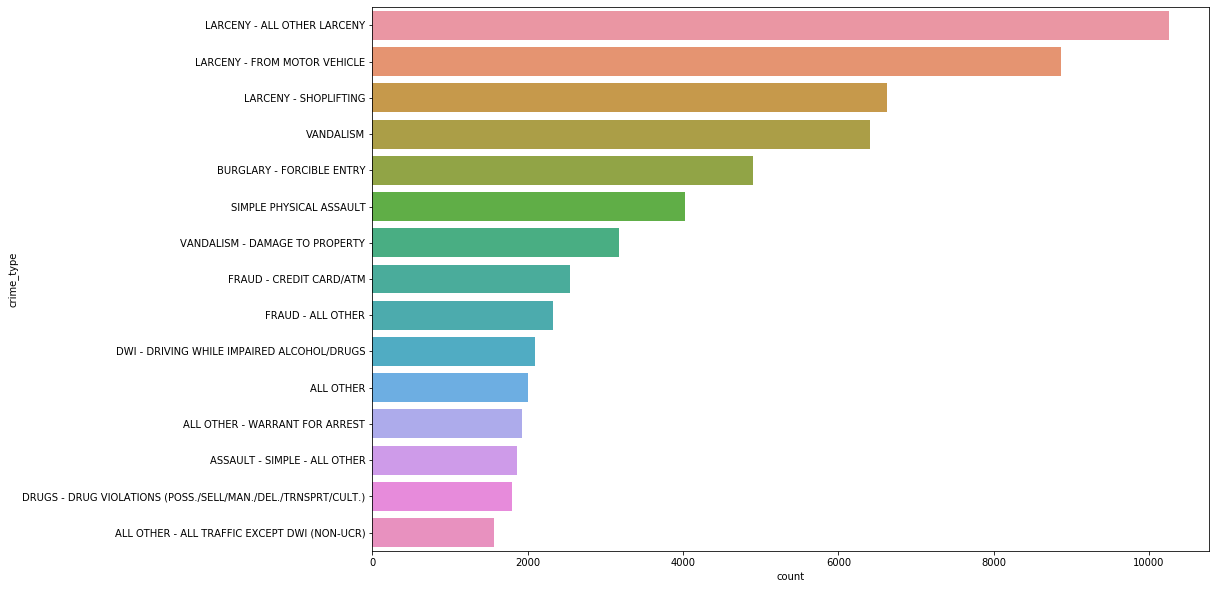

In [16]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'crime_type', data = cary_df, order = cary_df['crime_type'].value_counts().iloc[:15].index)

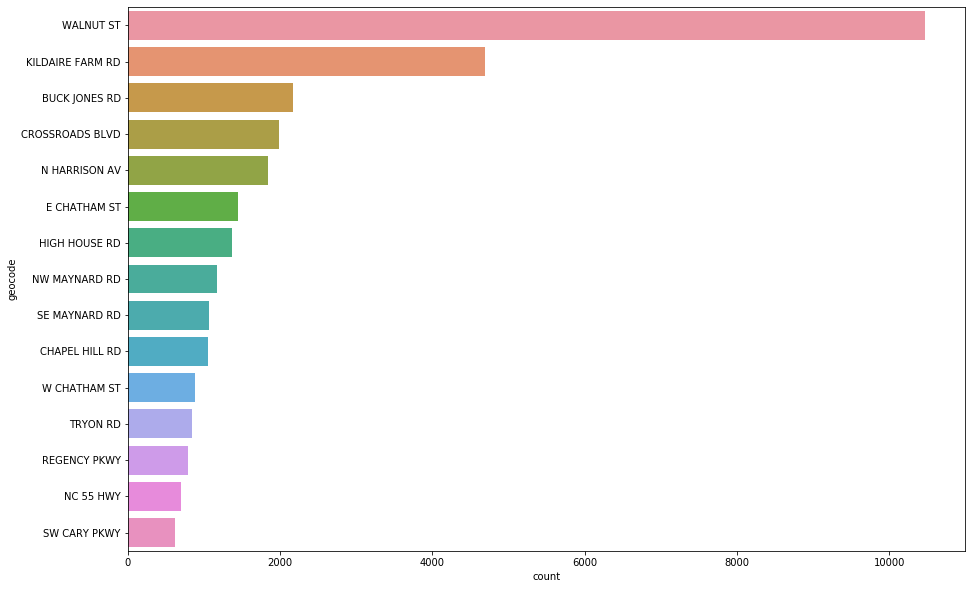

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'geocode', data = cary_df, order = cary_df['geocode'].value_counts().iloc[:15].index)

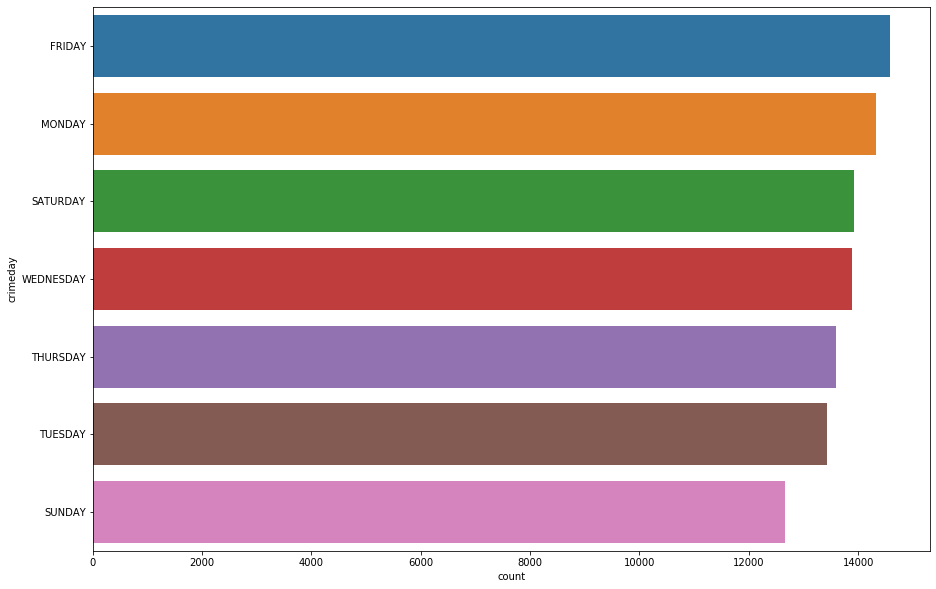

In [18]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'crimeday', data = cary_df, order = cary_df['crimeday'].value_counts().iloc[:15].index)

In [19]:
cary_df.resample('Y').size()

Date
1999-12-31       3
2000-12-31    4375
2001-12-31    4389
2002-12-31    4287
2003-12-31    4395
2004-12-31    4555
2005-12-31    4538
2006-12-31    4719
2007-12-31    4737
2008-12-31    4861
2009-12-31    4527
2010-12-31    4891
2011-12-31    5511
2012-12-31    5799
2013-12-31    5388
2014-12-31    5173
2015-12-31    5144
2016-12-31    5118
2017-12-31    5310
2018-12-31    4913
2019-12-31    3758
dtype: int64

Text(0, 0.5, 'Number of Crimes')

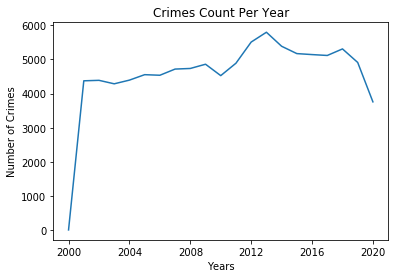

In [20]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(cary_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [21]:
cary_df.resample('M').size()

Date
1999-12-31      3
2000-01-31    322
2000-02-29    323
2000-03-31    303
2000-04-30    317
             ... 
2019-06-30    440
2019-07-31    420
2019-08-31    406
2019-09-30    367
2019-10-31    239
Length: 239, dtype: int64

Text(0, 0.5, 'Number of Crimes')

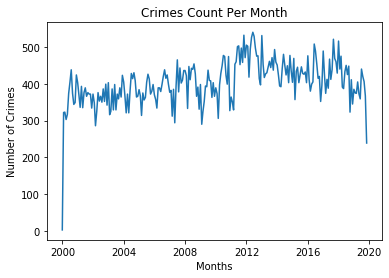

In [22]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(cary_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [23]:
cary_df.resample('Q').size()

Date
1999-12-31       3
2000-03-31     948
2000-06-30    1095
2000-09-30    1156
2000-12-31    1176
              ... 
2018-12-31    1141
2019-03-31    1154
2019-06-30    1172
2019-09-30    1193
2019-12-31     239
Length: 81, dtype: int64

Text(0, 0.5, 'Number of Crimes')

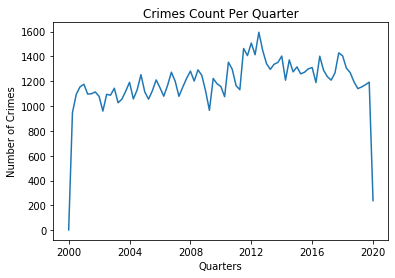

In [24]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(cary_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: CREATING A HEATMAP

In [25]:
cary_df.pickup_datetime = pd.to_datetime(cary_df.Date, format='%m/%d/%Y')
cary_df['month'] = cary_df.pickup_datetime.apply(lambda x: x.month)
cary_df['week'] = cary_df.pickup_datetime.apply(lambda x: x.week)
cary_df['day'] = cary_df.pickup_datetime.apply(lambda x: x.day)
cary_df['hour'] = cary_df.pickup_datetime.apply(lambda x: x.hour)

C:\Users\User_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [26]:
def generateBaseMap(default_location=[35.791538, -78.781120], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [27]:
base_map = generateBaseMap()
base_map

In [28]:
from folium.plugins import HeatMap
df_copy = cary_df[cary_df.month>=1].copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['lat', 'lon', 'count']].groupby(['lat', 'lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

# STEP #4:PREPARING THE DATA

In [29]:
cary_prophet = cary_df.resample('M').size().reset_index()
cary_prophet

,Date,0
0,1999-12-31,3
1,2000-01-31,322
2,2000-02-29,323
3,2000-03-31,303
4,2000-04-30,317
...,...,...
234,2019-06-30,440
235,2019-07-31,420
236,2019-08-31,406
237,2019-09-30,367


In [30]:
cary_prophet.columns = ['Date', 'Crime Count']
cary_prophet

,Date,Crime Count
0,1999-12-31,3
1,2000-01-31,322
2,2000-02-29,323
3,2000-03-31,303
4,2000-04-30,317
...,...,...
234,2019-06-30,440
235,2019-07-31,420
236,2019-08-31,406
237,2019-09-30,367


In [31]:
cary_prophet_df = pd.DataFrame(cary_prophet)
cary_prophet_df

,Date,Crime Count
0,1999-12-31,3
1,2000-01-31,322
2,2000-02-29,323
3,2000-03-31,303
4,2000-04-30,317
...,...,...
234,2019-06-30,440
235,2019-07-31,420
236,2019-08-31,406
237,2019-09-30,367


# STEP #5:TRAINING THE MODEL

In [32]:
cary_prophet.columns

Index(['Date', 'Crime Count'], dtype='object')

In [33]:
cary_prophet_df_final = cary_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
cary_prophet_df_final

,ds,y
0,1999-12-31,3
1,2000-01-31,322
2,2000-02-29,323
3,2000-03-31,303
4,2000-04-30,317
...,...,...
234,2019-06-30,440
235,2019-07-31,420
236,2019-08-31,406
237,2019-09-30,367


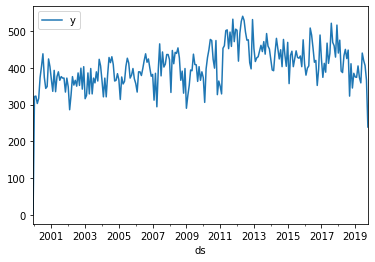

In [34]:
cary_prophet_df_final.plot(x='ds',y='y')

In [35]:
train = cary_prophet_df_final.iloc[:170]
test = cary_prophet_df_final.iloc[170:]

In [36]:
# creating the instance
m = Prophet()

# fit the instance to the data
m.fit(train)

# making the future data frame to a chosen time period
future = m.make_future_dataframe(periods=24,freq='MS')

# predict off that future data frame
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
189,2015-09-01,485.088432,456.508519,557.387584,484.851803,485.300713,22.602214,22.602214,22.602214,22.602214,22.602214,22.602214,0.0,0.0,0.0,507.690645
190,2015-10-01,485.970960,426.212009,531.934746,485.715865,486.205793,-6.868313,-6.868313,-6.868313,-6.868313,-6.868313,-6.868313,0.0,0.0,0.0,479.102648
191,2015-11-01,486.882906,423.905914,528.435753,486.605808,487.140064,-10.076253,-10.076253,-10.076253,-10.076253,-10.076253,-10.076253,0.0,0.0,0.0,476.806653
192,2015-12-01,487.765435,411.367075,513.956049,487.467949,488.031180,-25.331474,-25.331474,-25.331474,-25.331474,-25.331474,-25.331474,0.0,0.0,0.0,462.433960
193,2016-01-01,488.677381,466.919699,572.462819,488.359827,488.965603,31.141911,31.141911,31.141911,31.141911,31.141911,31.141911,0.0,0.0,0.0,519.819292


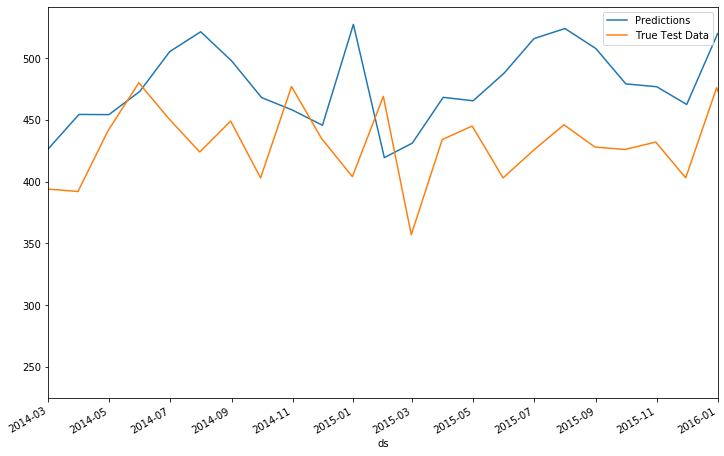

In [38]:
# Here I grabbed the output of the predictions and compared to the actual data

ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2014-03-01','2016-01-01'))

# STEP #6:MAKING PREDICTIONS

In [39]:
cary_prophet.columns

Index(['Date', 'Crime Count'], dtype='object')

In [40]:
cary_prophet_df_final = cary_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
cary_prophet_df_final

,ds,y
0,1999-12-31,3
1,2000-01-31,322
2,2000-02-29,323
3,2000-03-31,303
4,2000-04-30,317
...,...,...
234,2019-06-30,440
235,2019-07-31,420
236,2019-08-31,406
237,2019-09-30,367


In [41]:
m = Prophet()
m.fit(cary_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-12-31,339.505611,265.919967,380.271748,339.505611,339.505611,-18.311948,-18.311948,-18.311948,-18.311948,-18.311948,-18.311948,0.0,0.0,0.0,321.193663
1,2000-01-31,340.194797,276.662466,386.867541,340.194797,340.194797,-7.116433,-7.116433,-7.116433,-7.116433,-7.116433,-7.116433,0.0,0.0,0.0,333.078364
2,2000-02-29,340.839520,237.054582,347.871878,340.839520,340.839520,-48.879661,-48.879661,-48.879661,-48.879661,-48.879661,-48.879661,0.0,0.0,0.0,291.959859
3,2000-03-31,341.528706,276.977461,385.092837,341.528706,341.528706,-10.640514,-10.640514,-10.640514,-10.640514,-10.640514,-10.640514,0.0,0.0,0.0,330.888192
4,2000-04-30,342.195661,277.628669,382.410480,342.195661,342.195661,-15.632593,-15.632593,-15.632593,-15.632593,-15.632593,-15.632593,0.0,0.0,0.0,326.563068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2020-10-26,402.584673,415.769592,523.681851,402.118204,403.057155,66.960905,66.960905,66.960905,66.960905,66.960905,66.960905,0.0,0.0,0.0,469.545578
600,2020-10-27,402.569792,401.962249,507.255676,402.101428,403.044468,54.493660,54.493660,54.493660,54.493660,54.493660,54.493660,0.0,0.0,0.0,457.063452
601,2020-10-28,402.554911,386.426966,498.620299,402.084652,403.032634,40.866765,40.866765,40.866765,40.866765,40.866765,40.866765,0.0,0.0,0.0,443.421676
602,2020-10-29,402.540030,375.462032,482.765489,402.067922,403.019422,26.388985,26.388985,26.388985,26.388985,26.388985,26.388985,0.0,0.0,0.0,428.929015


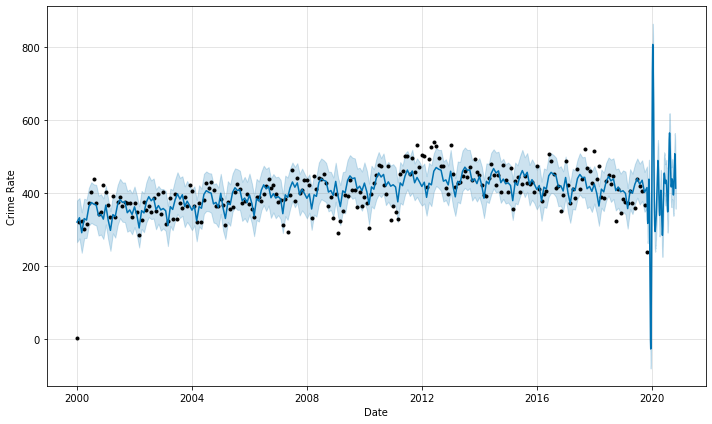

In [43]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')


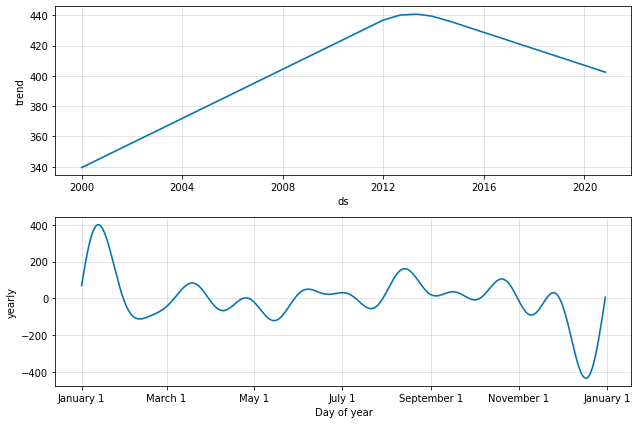

In [44]:
figure2 = m.plot_components(forecast)

# STEP #7:EVALUATION

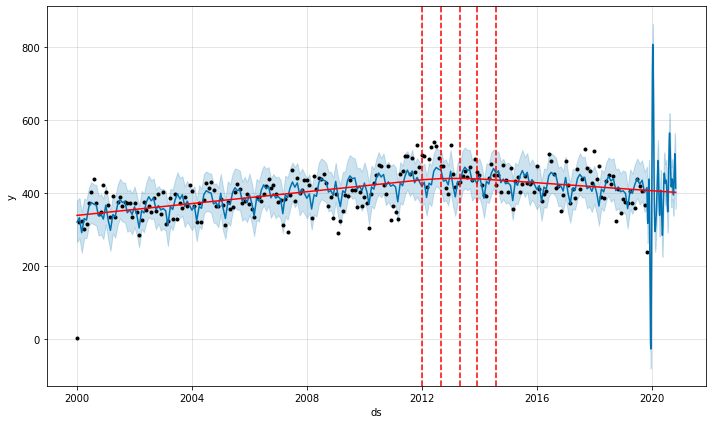

In [45]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

In [46]:
from statsmodels.tools.eval_measures import rmse

In [47]:
predictions = forecast.iloc[-12:]['yhat']
predictions

592    507.927249
593    508.338186
594    506.768737
595    503.172834
596    497.559461
597    489.993943
598    480.597571
599    469.545578
600    457.063452
601    443.421676
602    428.929015
603    413.924502
Name: yhat, dtype: float64

In [48]:
test['y']

170    394
171    392
172    441
173    480
174    451
      ... 
234    440
235    420
236    406
237    367
238    239
Name: y, Length: 69, dtype: int64

In [49]:
# the mean values through out the time series 
test.mean()

y    420.188406
dtype: float64

In [50]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [51]:
# Define an initial training period, Horizon period

In [52]:
#INITIAL
initial = 5 *365
initial = str(initial) + ' days'
initial

'1825 days'

In [53]:
#PERIOD
period = 5*365
period = str(period) + ' days'

In [54]:
#HORIZON
horizon = 365
horizon = str(horizon) + ' days'

In [55]:
# crossvalidation
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2008-11-02 00:00:00 and 2018-10-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-11-30,421.635677,368.895297,473.237370,331,2008-11-02
1,2008-12-31,417.135321,365.576513,469.173431,398,2008-11-02
2,2009-01-31,394.347814,338.022824,445.981087,290,2008-11-02
3,2009-02-28,359.720050,310.822848,412.296596,324,2008-11-02
4,2009-03-31,413.577874,358.950164,463.266973,352,2008-11-02


In [56]:
# will tell us the evaluation metrics for different horizons that I am predicting
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,4950.848358,70.362265,59.571902,0.174720,0.235303,0.333333
1,59 days,2334.626556,48.317973,35.738449,0.099472,0.048079,0.666667
2,60 days,2377.162737,48.756156,37.850693,0.104244,0.048079,0.666667
3,61 days,695.542621,26.373142,23.894064,0.059844,0.048079,1.000000
4,90 days,4202.977849,64.830378,52.298228,0.163758,0.102103,0.666667
5,91 days,4235.907932,65.083853,53.403607,0.167019,0.102103,0.666667
6,92 days,4439.763778,66.631552,55.780907,0.174266,0.123844,0.666667
7,118 days,1235.582366,35.150852,32.904985,0.091075,0.110247,1.000000
8,119 days,1170.629087,34.214457,30.352842,0.085557,0.110247,1.000000
9,120 days,451.752127,21.254461,15.012729,0.044651,0.022581,1.000000


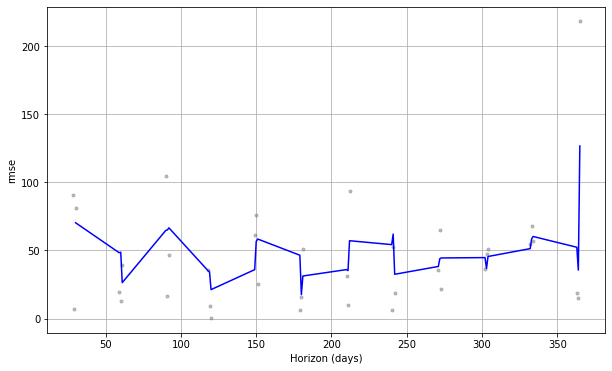

In [58]:
# rmse for our horizon predictions
plot_cross_validation_metric(df_cv, metric='rmse');

In [ ]:
# 